In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%config Completer.use_jedi = False
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday/train.csv
/kaggle/input/black-friday/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df_train=pd.read_csv('/kaggle/input/black-friday/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_test=pd.read_csv('/kaggle/input/black-friday/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
print(df_test.shape)
print(df_train.shape)

(233599, 11)
(550068, 12)


In [6]:
## Merge both train and test data
df=df_train.append(df_test)
df.head()

/tmp/ipykernel_20/3831971621.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
df.drop(['User_ID'], axis = 1, inplace = True)

In [8]:
df.size

8620337

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 71.7+ MB


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Occupation,783667.0,8.079300,6.522206,0.0,2.0,7.0,14.0,20.0
Marital_Status,783667.0,0.409777,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,5.366196,3.878160,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,9.844506,5.089093,2.0,5.0,9.0,15.0,18.0
Product_Category_3,237858.0,12.668605,4.125510,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [11]:
df.shape

(783667, 11)

In [12]:
df.duplicated().sum()

15967

In [13]:
df = df.drop_duplicates()

In [14]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            242509
Product_Category_3            536383
Purchase                      217745
dtype: int64

<Axes: >

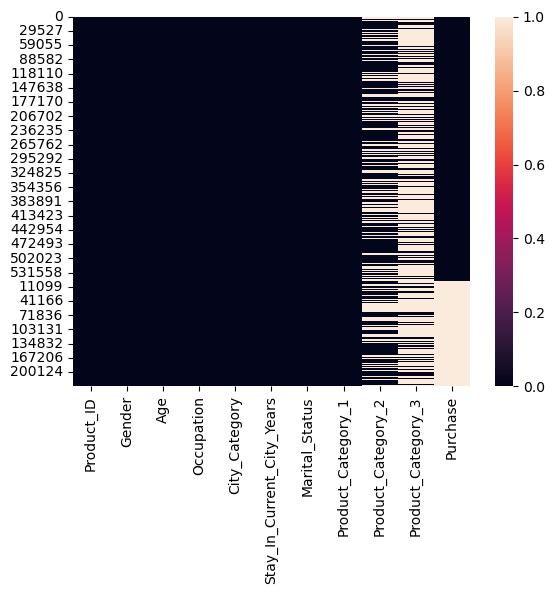

In [15]:
sns.heatmap(df.isnull())

/tmp/ipykernel_20/1426775114.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Product_Category_2'])


<Axes: xlabel='Product_Category_2', ylabel='Density'>

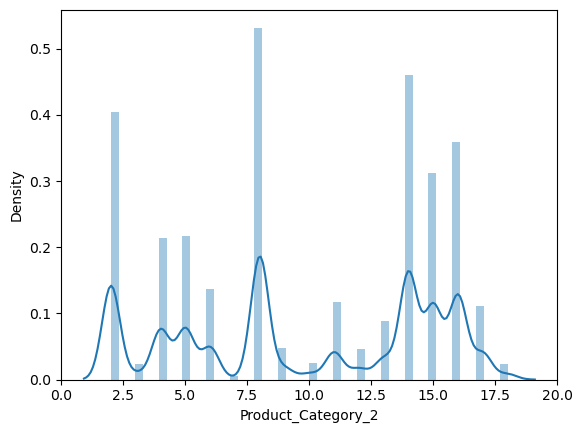

In [16]:
sns.distplot(df['Product_Category_2'])

/tmp/ipykernel_20/758807245.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Product_Category_3'])


<Axes: xlabel='Product_Category_3', ylabel='Density'>

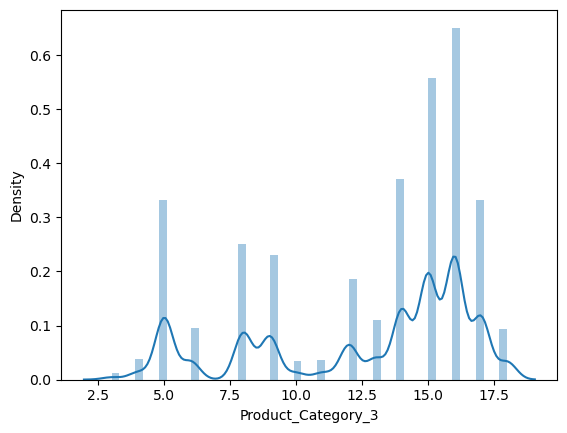

In [17]:
sns.distplot(df['Product_Category_3'])

In [18]:
df['Product_Category_2_mean'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mean())
df[['Product_Category_2_mean','Product_Category_2']]

,Product_Category_2_mean,Product_Category_2
0,9.856799,NaN
1,6.000000,6.0
2,9.856799,NaN
3,14.000000,14.0
4,9.856799,NaN
...,...,...
233594,9.856799,NaN
233595,8.000000,8.0
233596,5.000000,5.0
233597,16.000000,16.0


/tmp/ipykernel_20/4119239338.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Product_Category_2_mean'])


<Axes: xlabel='Product_Category_2_mean', ylabel='Density'>

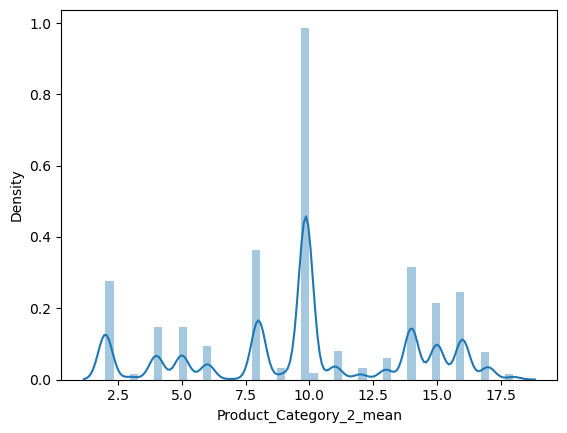

In [19]:
sns.distplot(df['Product_Category_2_mean'])

In [20]:
df['Product_Category_3_mean'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mean())
df[['Product_Category_3_mean','Product_Category_3']]

,Product_Category_3_mean,Product_Category_3
0,12.673336,NaN
1,14.000000,14.0
2,12.673336,NaN
3,12.673336,NaN
4,12.673336,NaN
...,...,...
233594,12.673336,NaN
233595,12.673336,NaN
233596,12.000000,12.0
233597,12.673336,NaN


M    576035
F    191665
Name: Gender, dtype: int64


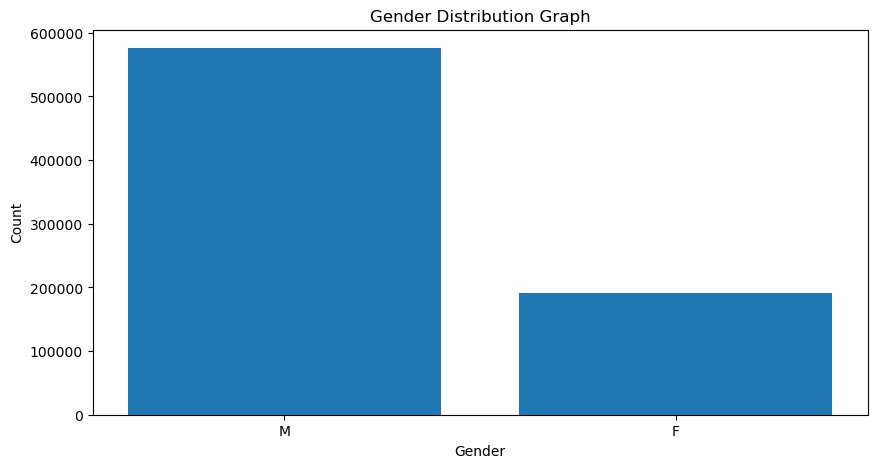

In [21]:
gender_count = df['Gender'].value_counts()
print(gender_count)

plt.figure(figsize= (10,5))
plt.bar(gender_count.index, gender_count.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution Graph')
plt.show()

In [22]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

26-35    305937
36-45    154509
18-25    136798
46-50     64848
51-55     54391
55+       30405
0-17      20812
Name: Age, dtype: int64


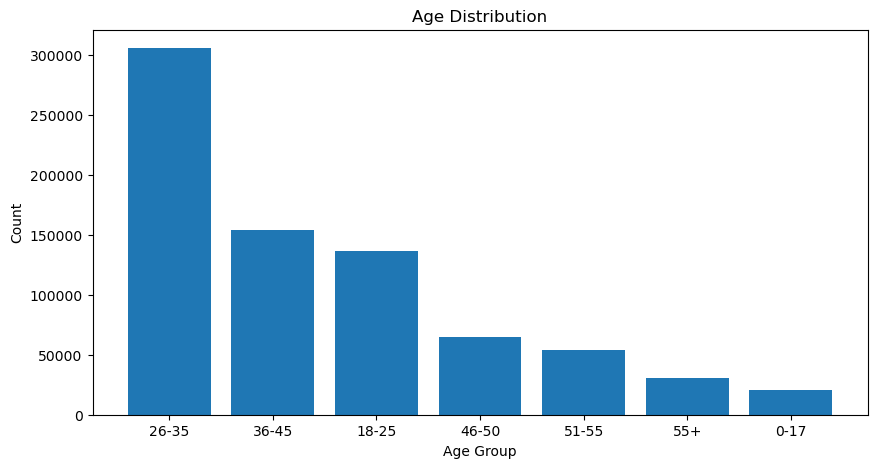

In [23]:
age_counts = df['Age'].value_counts()
print(age_counts)

plt.figure(figsize = (10,5))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [24]:
df['Age']

0          0-17
1          0-17
2          0-17
3          0-17
4           55+
          ...  
233594    26-35
233595    26-35
233596    26-35
233597    46-50
233598    46-50
Name: Age, Length: 767700, dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
temp = label_encoder.fit_transform(df['Age'])
df['Age'] = pd.Series(temp)

In [26]:
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

5     211779
1     194795
8     159891
11     33989
2      33471
6      28634
3      28133
4      16481
16     13731
15      8832
13      7823
10      7207
12      5548
7       5318
18      4384
20      2543
14      2177
19      1572
17       799
9        593
Name: Product_Category_1, dtype: int64


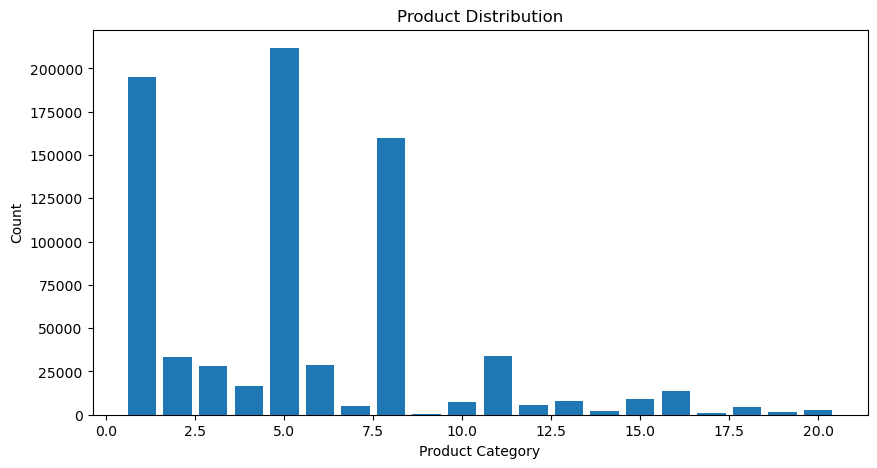

In [27]:
product_cat_count = df['Product_Category_1'].value_counts()
print(product_cat_count)

plt.figure(figsize = (10,5))
plt.bar(product_cat_count.index, product_cat_count.values)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Product Distribution')
plt.show()

5     211779
1     194795
8     159891
11     33989
2      33471
6      28634
3      28133
4      16481
16     13731
15      8832
13      7823
10      7207
12      5548
7       5318
18      4384
20      2543
14      2177
19      1572
17       799
9        593
Name: Product_Category_1, dtype: int64


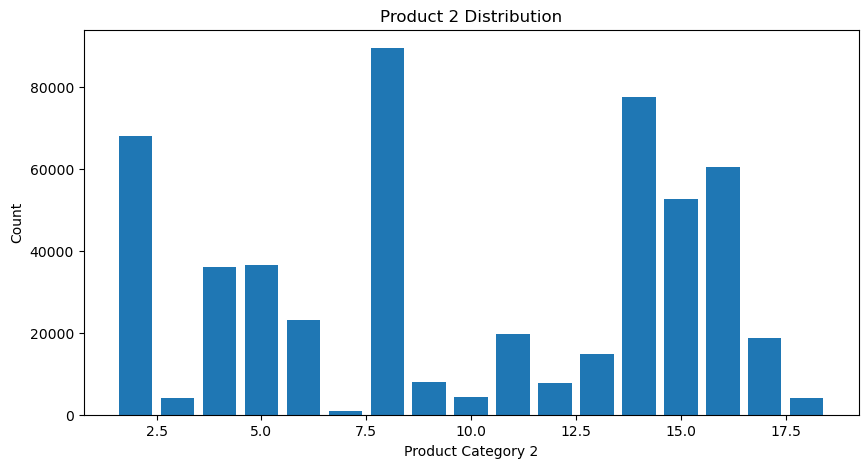

In [28]:
product_cat2_count = df['Product_Category_2'].value_counts()
print(product_cat_count)

plt.figure(figsize = (10,5))
plt.bar(product_cat2_count.index, product_cat2_count.values)
plt.xlabel('Product Category 2')
plt.ylabel('Count')
plt.title('Product 2 Distribution')
plt.show()

5     211779
1     194795
8     159891
11     33989
2      33471
6      28634
3      28133
4      16481
16     13731
15      8832
13      7823
10      7207
12      5548
7       5318
18      4384
20      2543
14      2177
19      1572
17       799
9        593
Name: Product_Category_1, dtype: int64


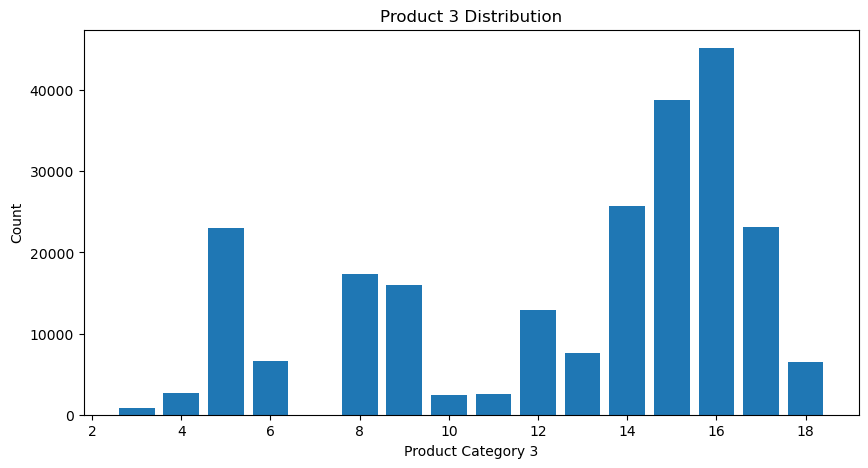

In [29]:
product_cat3_count = df['Product_Category_3'].value_counts()
print(product_cat_count)

plt.figure(figsize = (10,5))
plt.bar(product_cat3_count.index, product_cat3_count.values)
plt.xlabel('Product Category 3')
plt.ylabel('Count')
plt.title('Product 3 Distribution')
plt.show()

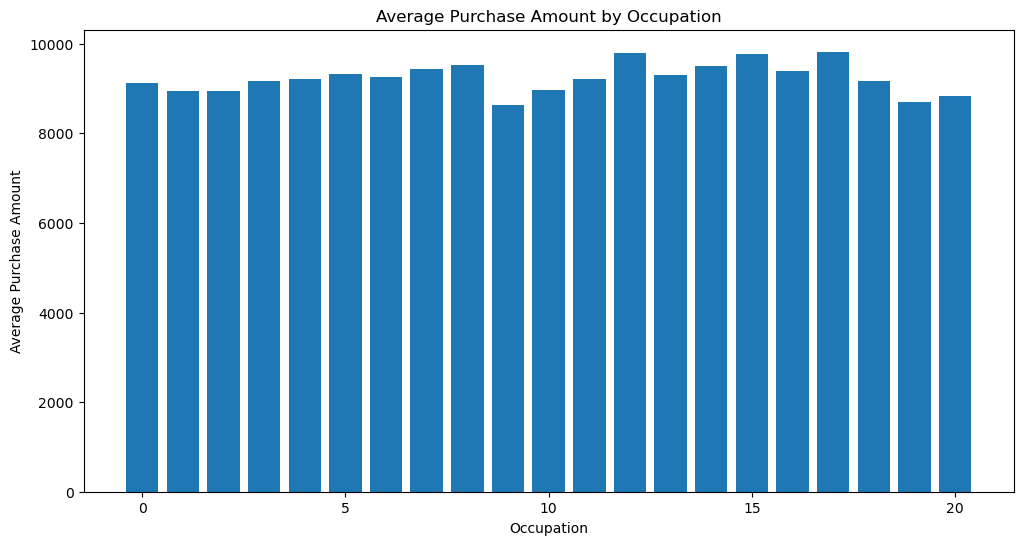

In [30]:
avg_occ_purchase = df.groupby('Occupation')['Purchase'].mean()
plt.figure(figsize=(12, 6))
plt.bar(avg_occ_purchase.index, avg_occ_purchase.values)
plt.xlabel('Occupation')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Occupation')
plt.xticks(rotation=0)
plt.show()

In [31]:
df['Gender'] = pd.get_dummies(df['Gender'], drop_first = True)
df['Gender']

0         0
1         0
2         0
3         0
4         1
         ..
233594    0
233595    0
233596    0
233597    0
233598    0
Name: Gender, Length: 767700, dtype: uint8

In [32]:
df = pd.concat([df,pd.get_dummies(df['City_Category'])], axis = 1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_2_mean,Product_Category_3_mean,A,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,9.856799,12.673336,1,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,6.000000,14.000000,1,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,9.856799,12.673336,1,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,14.000000,12.673336,1,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,9.856799,12.673336,0,0,1


In [33]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace("+","")
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df.info()

/tmp/ipykernel_20/3428308413.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace("+","")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 767700 entries, 0 to 233598
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  767700 non-null  object 
 1   Gender                      767700 non-null  uint8  
 2   Age                         767700 non-null  int64  
 3   Occupation                  767700 non-null  int64  
 4   City_Category               767700 non-null  object 
 5   Stay_In_Current_City_Years  767700 non-null  int64  
 6   Marital_Status              767700 non-null  int64  
 7   Product_Category_1          767700 non-null  int64  
 8   Product_Category_2          525191 non-null  float64
 9   Product_Category_3          231317 non-null  float64
 10  Purchase                    549955 non-null  float64
 11  Product_Category_2_mean     767700 non-null  float64
 12  Product_Category_3_mean     767700 non-null  float64
 13  A             

In [34]:
df[['A','B','C']] = df[['A','B','C']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767700 entries, 0 to 233598
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  767700 non-null  object 
 1   Gender                      767700 non-null  uint8  
 2   Age                         767700 non-null  int64  
 3   Occupation                  767700 non-null  int64  
 4   City_Category               767700 non-null  object 
 5   Stay_In_Current_City_Years  767700 non-null  int64  
 6   Marital_Status              767700 non-null  int64  
 7   Product_Category_1          767700 non-null  int64  
 8   Product_Category_2          525191 non-null  float64
 9   Product_Category_3          231317 non-null  float64
 10  Purchase                    549955 non-null  float64
 11  Product_Category_2_mean     767700 non-null  float64
 12  Product_Category_3_mean     767700 non-null  float64
 13  A             

<Axes: xlabel='Age', ylabel='Purchase'>

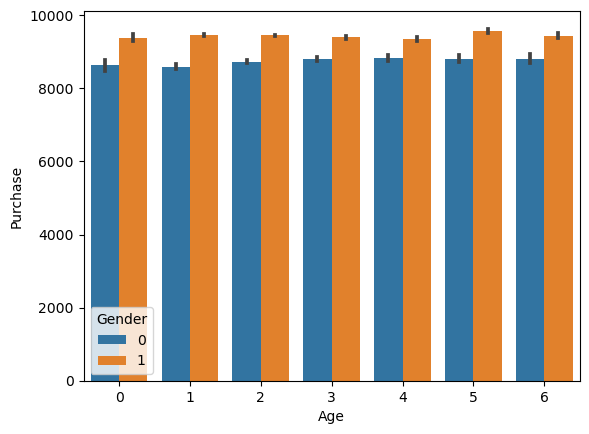

In [35]:
sns.barplot(x='Age',y='Purchase', hue = 'Gender',data=df)

<Axes: xlabel='Product_Category_2_mean', ylabel='Purchase'>

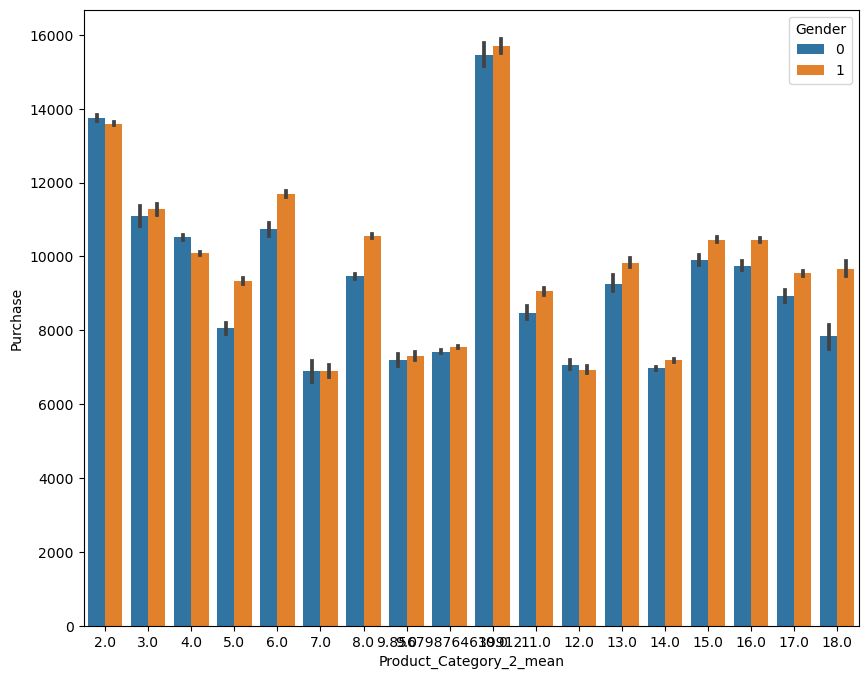

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(x='Product_Category_2_mean', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_3_mean', ylabel='Purchase'>

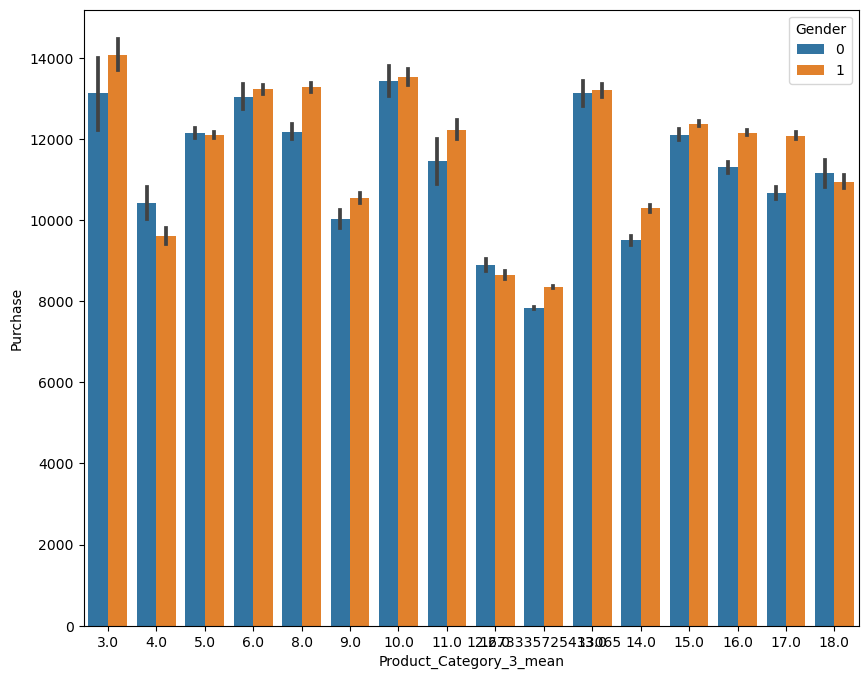

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(x='Product_Category_3_mean', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

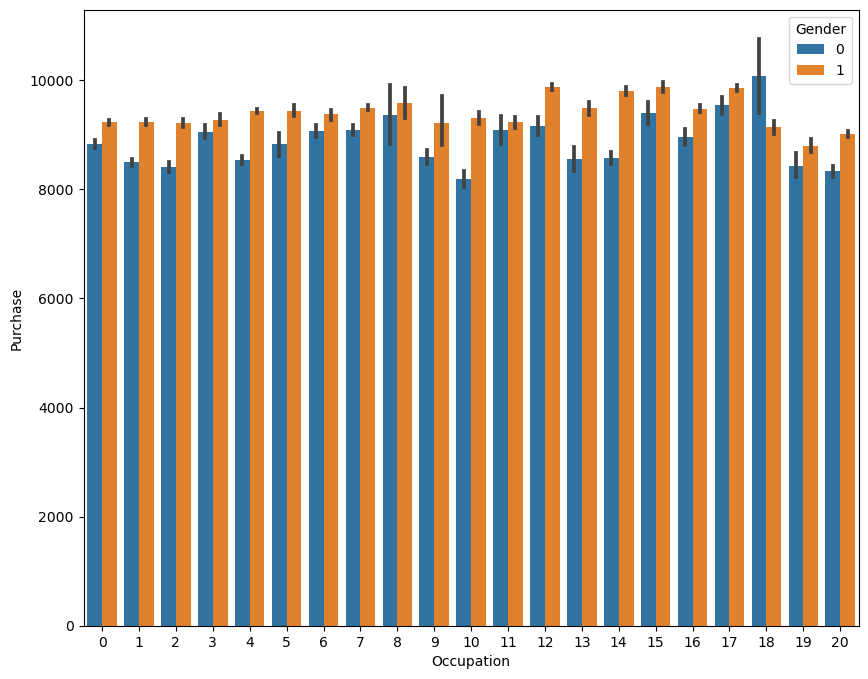

In [38]:
plt.figure(figsize=(10,8))
sns.barplot(x='Occupation',y='Purchase',hue = 'Gender', data=df)